# Unwrapping Business Insights: A Data Analytics Journey for SuperGifts Inc.






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
sale = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DA Assignments(China)/Online Retail EDA & ML/Sales Transaction v.4a.csv")
sale

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


# Data Exploration and Cleaning

In [ ]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [ ]:
#Check null in data set
sale.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [ ]:
# Remove null CustomerNo.
sale = sale[sale.CustomerNo.notnull()]
sale

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [ ]:
#Verifying the dataset after removing null values
sale.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [ ]:
duplicate_values = sale.duplicated()
sale[duplicate_values]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
985,581497,12/9/2019,21481,Fawn Blue Hot Water Bottle,7.24,1,17497.0,United Kingdom
1365,581538,12/9/2019,23275,Set Of 3 Hanging Owls Ollie Beak,6.19,1,14446.0,United Kingdom
1401,581538,12/9/2019,22992,Revolver Wooden Ruler,6.19,1,14446.0,United Kingdom
1406,581538,12/9/2019,22694,Wicker Star,6.19,1,14446.0,United Kingdom
1409,581538,12/9/2019,23343,Jumbo Bag Vintage Christmas,6.19,1,14446.0,United Kingdom
...,...,...,...,...,...,...,...,...
535227,536559,12/1/2018,51014L,Feather Pen Light Pink,11.12,12,17873.0,United Kingdom
535310,536569,12/1/2018,22111,Scottie Dog Hot Water Bottle,15.32,1,16274.0,United Kingdom
535327,536569,12/1/2018,21809,Christmas Hanging Tree With Bell,11.53,1,16274.0,United Kingdom
535960,536592,12/1/2018,82613A,Metal Sign Cupcake Single Hook,12.82,1,16592.0,United Kingdom


In [ ]:
# Drop the duplicate rows from the DataFrame
sale_without_duplicates = sale.drop_duplicates()

# Display the DataFrame without duplicate values
sale_without_duplicates

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [ ]:
sale = sale_without_duplicates

In [ ]:
# Find duplicate values in the 'TransactionNo' column
duplicate_mask = sale['TransactionNo'].duplicated(keep=False)

# Use boolean indexing to display only the rows with duplicate 'TransactionNo'
duplicate_transactions = sale[duplicate_mask]

# Display the duplicate values
duplicate_transactions

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


# Transforming Variables

### Date-Time Transformation

In [ ]:
# Convert Date to datetime
sale['Date'] = pd.to_datetime(sale['Date'])

<ipython-input-155-31d85c4cdd46>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531095 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  531095 non-null  object        
 1   Date           531095 non-null  datetime64[ns]
 2   ProductNo      531095 non-null  object        
 3   ProductName    531095 non-null  object        
 4   Price          531095 non-null  float64       
 5   Quantity       531095 non-null  int64         
 6   CustomerNo     531095 non-null  float64       
 7   Country        531095 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


### Creating New Features

In [ ]:
sale['Month'] = sale['Date'].dt.month
sale['Year'] = sale['Date'].dt.year

<ipython-input-157-6371067b3fb4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-157-6371067b3fb4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

sale['Season'] = sale['Date'].dt.month.apply(get_season)

<ipython-input-158-30de491f3da1>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
sale

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Season
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,12,2019,Winter
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,12,2019,Winter
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,12,2019,Winter
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,12,2019,Winter
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,12,2019,Winter
...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,12,2018,Winter
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,12,2018,Winter
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,12,2018,Winter
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,12,2018,Winter


In [ ]:
sale.dtypes

TransactionNo            object
Date             datetime64[ns]
ProductNo                object
ProductName              object
Price                   float64
Quantity                  int64
CustomerNo              float64
Country                  object
Month                     int64
Year                      int64
Season                   object
dtype: object

# Dealing with Outliers

In [ ]:
# Assuming 'sale' is the name of your DataFrame
# Select only numeric columns to check for outliers
numeric_columns = sale.select_dtypes(include=['int64', 'float64'])

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define a threshold to identify outliers (you can change the multiplier as needed)
outlier_threshold = 1.5

# Check for outliers using the IQR method
outliers = (numeric_columns < (Q1 - outlier_threshold * IQR)) | (numeric_columns > (Q3 + outlier_threshold * IQR))

# Display the rows with outlier values
outlier_rows = sale[outliers.any(axis=1)]
outlier_rows

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Season
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,12,2019,Winter
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,12,2019,Winter
5,581475,2019-12-09,21705,Bag 500g Swirly Marbles,10.65,24,13069.0,United Kingdom,12,2019,Winter
9,581475,2019-12-09,22216,T-Light Holder White Lace,10.55,24,13069.0,United Kingdom,12,2019,Winter
16,581475,2019-12-09,22955,36 Foil Star Cake Cases,11.06,24,13069.0,United Kingdom,12,2019,Winter
...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,12,2018,Winter
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,12,2018,Winter
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,12,2018,Winter
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,12,2018,Winter


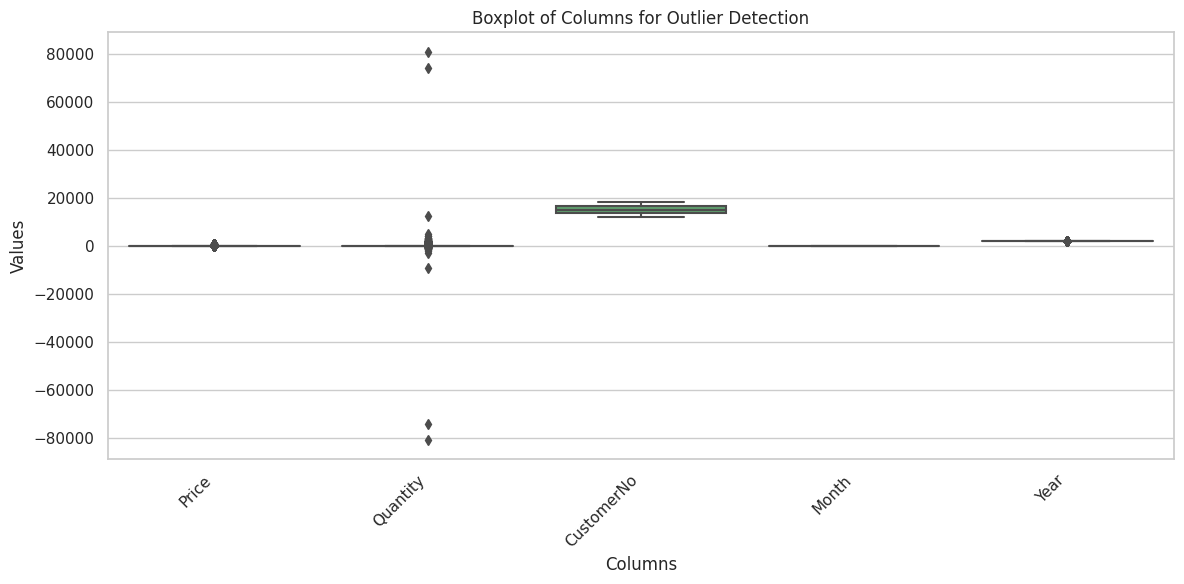

In [ ]:
import seaborn as sns
# Create a boxplot for all columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=sale)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of Columns for Outlier Detection')
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

z=np.abs(stats.zscore(sale.Price))
z

0         1.032159
1         0.236875
2         0.133663
3         0.236875
4         0.085576
            ...   
536345    0.737771
536346    0.166589
536347    0.109033
536348    0.431655
536349    0.912527
Name: Price, Length: 531095, dtype: float64

In [ ]:
threshold = 3

z_df = np.where(z>3)

In [ ]:
z_df

(array([ 12209,  12210,  48870,  52730,  55594,  58828,  58829,  58830,
         61665,  61666,  65185,  65186,  65187,  65188,  65189,  65190,
         65191,  65192,  65193,  69276,  69277,  72646,  72647,  72648,
         76155,  76156,  76157,  79122,  79123,  83126,  83127,  83128,
         83129,  86327,  88990,  88991,  88992,  88993,  88994,  92981,
         92982,  92983,  95034,  95035,  98380, 101295, 103652, 103653,
        103654, 103655, 106233, 106234, 107981, 111332, 114178, 118262,
        118263, 118264, 118265, 118266, 118267, 120132, 120133, 122562,
        122563, 122564, 122565, 122566, 122567, 122568, 125446, 128508,
        130802, 130803, 130804, 133061, 133062, 133063, 135924, 135925,
        135926, 135927, 138818, 138819, 140043, 140044, 141818, 141819,
        141820, 141821, 144115, 144116, 144117, 144118, 144119, 144120,
        146263, 155479, 155480, 155481, 155482, 155483, 158572, 158573,
        158574, 158575, 160970, 160971, 160972, 163705, 163706, 

In [ ]:
sale1 = sale[(z<3)]
sale1

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Season
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,12,2019,Winter
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,12,2019,Winter
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,12,2019,Winter
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,12,2019,Winter
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,12,2019,Winter
...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,12,2018,Winter
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,12,2018,Winter
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,12,2018,Winter
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,12,2018,Winter


In [ ]:
sale.shape

(531095, 11)

In [ ]:
# Select only numeric columns for calculating skewness
numeric_columns = sale.select_dtypes(include=['int64', 'float64'])

# Calculate the skewness for each numeric column
skewness = numeric_columns.skew()

# Print the skewness distribution
print("Skewness Distribution:")
print(skewness)

Skewness Distribution:
Price         51.945688
Quantity       0.238061
CustomerNo     0.009585
Month         -0.414823
Year          -3.140595
dtype: float64


# Exploratory Data Analysis(EDA)

In [ ]:
sale.describe()

# You will notice that Quantity has negative value? After checking TransactionNo Starts will C means Cancel

,Price,Quantity,CustomerNo,Month,Year
count,531095.000000,531095.000000,531095.000000,531095.000000,531095.000000
mean,12.669635,9.993146,15222.612241,7.552238,2018.921743
std,8.526181,217.710261,1716.633588,3.508959,0.268576
min,5.130000,-80995.000000,12004.000000,1.000000,2018.000000
25%,10.990000,1.000000,13798.000000,5.000000,2019.000000
50%,11.940000,3.000000,15146.000000,8.000000,2019.000000
75%,14.090000,10.000000,16727.000000,11.000000,2019.000000
max,660.620000,80995.000000,18287.000000,12.000000,2019.000000


### 1.  Visualize data distributions using histograms

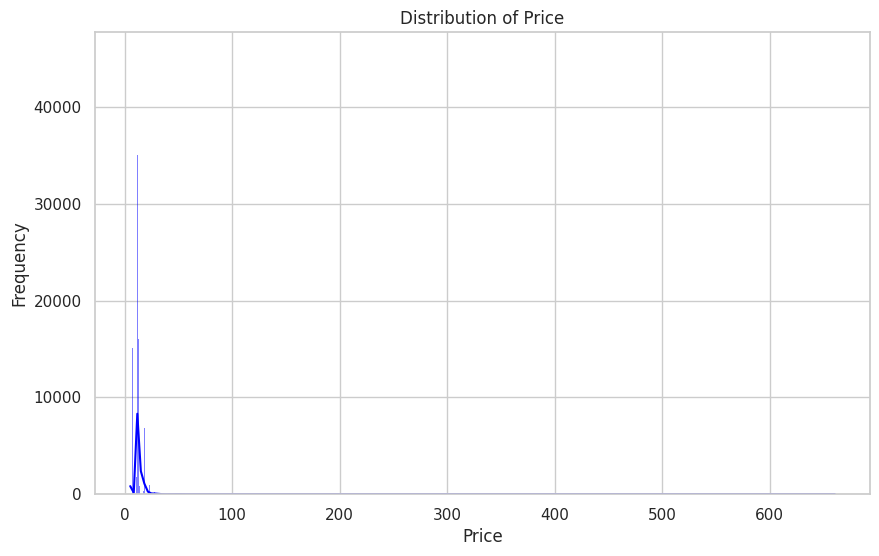

In [ ]:
# Visualize data distribution of 'Price' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(sale['Price'], kde=True, color='blue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()


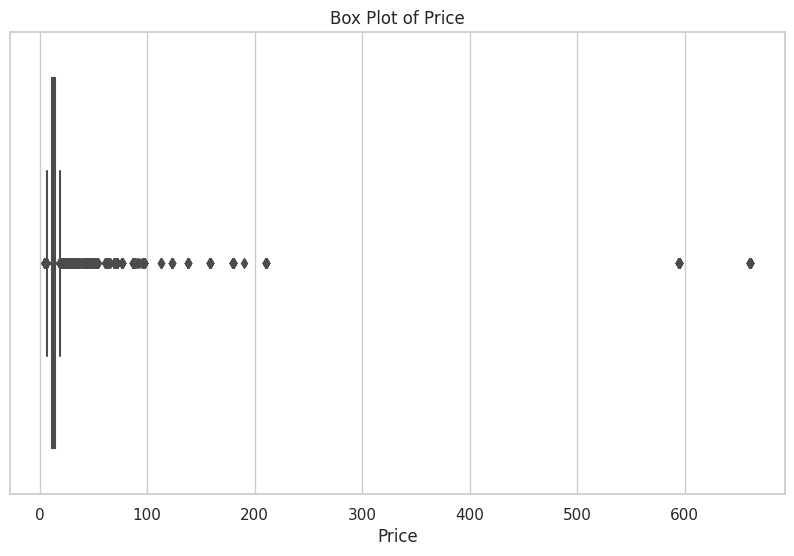

In [ ]:
# Visualize data distributions using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price', data=sale, color='blue')
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

<ipython-input-172-1f84da416e0f>:15: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



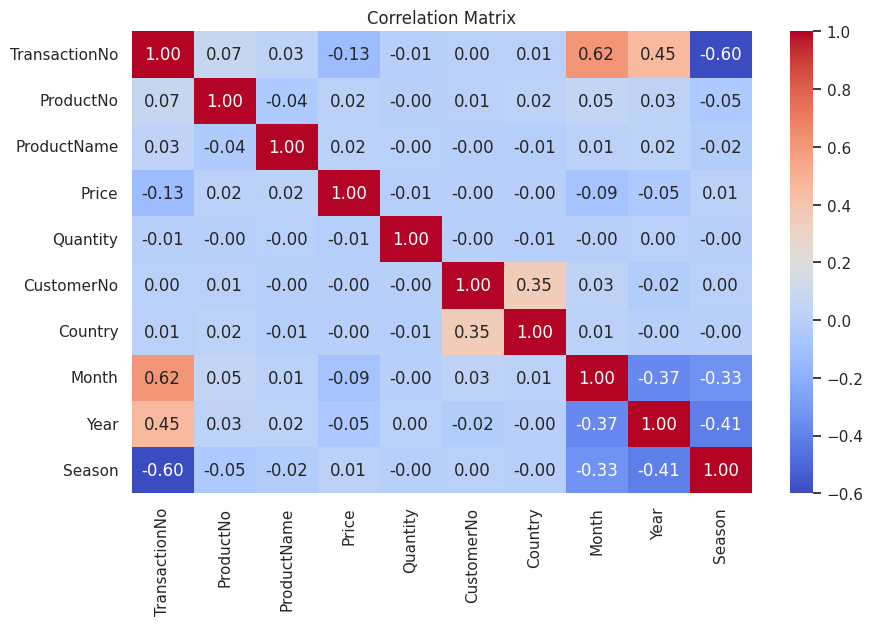

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original dataset
sale_encoded = sale.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = sale_encoded.select_dtypes(include=['object']).columns
for col in categorical_columns:
    sale_encoded[col] = label_encoder.fit_transform(sale_encoded[col])

# Calculate correlation matrix
correlation_matrix = sale_encoded.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Create a copy of the original dataset
sale_encoded = sale.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = sale_encoded.select_dtypes(include=['object']).columns
for col in categorical_columns:
    sale_encoded[col] = label_encoder.fit_transform(sale_encoded[col])

# Calculate correlation matrix
correlation_matrix = sale_encoded.corr()

# Output DataFrame for correlation matrix
correlation_df = pd.DataFrame(correlation_matrix)

# Display the DataFrame
print("Correlation Matrix DataFrame:")
correlation_df

<ipython-input-173-ed6c2b051a2e>:13: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Correlation Matrix DataFrame:


,TransactionNo,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Season
TransactionNo,1.000000,0.073549,0.031180,-0.130239,-0.005401,0.002543,0.008725,0.618367,0.451073,-0.600439
ProductNo,0.073549,1.000000,-0.040899,0.015575,-0.000766,0.011277,0.018791,0.053928,0.028271,-0.050963
ProductName,0.031180,-0.040899,1.000000,0.015498,-0.000012,-0.004769,-0.011610,0.014649,0.023412,-0.021465
Price,-0.130239,0.015575,0.015498,1.000000,-0.007209,-0.002913,-0.004368,-0.093993,-0.050825,0.012841
Quantity,-0.005401,-0.000766,-0.000012,-0.007209,1.000000,-0.002115,-0.009578,-0.001320,0.002375,-0.001131
CustomerNo,0.002543,0.011277,-0.004769,-0.002913,-0.002115,1.000000,0.354645,0.026463,-0.020340,0.001831
Country,0.008725,0.018791,-0.011610,-0.004368,-0.009578,0.354645,1.000000,0.014258,-0.000914,-0.000599
Month,0.618367,0.053928,0.014649,-0.093993,-0.001320,0.026463,0.014258,1.000000,-0.369335,-0.325774
Year,0.451073,0.028271,0.023412,-0.050825,0.002375,-0.020340,-0.000914,-0.369335,1.000000,-0.407668
Season,-0.600439,-0.050963,-0.021465,0.012841,-0.001131,0.001831,-0.000599,-0.325774,-0.407668,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original dataset
sale_encoded = sale.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = sale_encoded.select_dtypes(include=['object']).columns
for col in categorical_columns:
    sale_encoded[col] = label_encoder.fit_transform(sale_encoded[col])

# Calculate correlation matrix
correlation_matrix = sale_encoded.corr()

# Print correlation matrix
correlation_matrix

<ipython-input-174-49632312a50f>:15: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,TransactionNo,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Season
TransactionNo,1.000000,0.073549,0.031180,-0.130239,-0.005401,0.002543,0.008725,0.618367,0.451073,-0.600439
ProductNo,0.073549,1.000000,-0.040899,0.015575,-0.000766,0.011277,0.018791,0.053928,0.028271,-0.050963
ProductName,0.031180,-0.040899,1.000000,0.015498,-0.000012,-0.004769,-0.011610,0.014649,0.023412,-0.021465
Price,-0.130239,0.015575,0.015498,1.000000,-0.007209,-0.002913,-0.004368,-0.093993,-0.050825,0.012841
Quantity,-0.005401,-0.000766,-0.000012,-0.007209,1.000000,-0.002115,-0.009578,-0.001320,0.002375,-0.001131
CustomerNo,0.002543,0.011277,-0.004769,-0.002913,-0.002115,1.000000,0.354645,0.026463,-0.020340,0.001831
Country,0.008725,0.018791,-0.011610,-0.004368,-0.009578,0.354645,1.000000,0.014258,-0.000914,-0.000599
Month,0.618367,0.053928,0.014649,-0.093993,-0.001320,0.026463,0.014258,1.000000,-0.369335,-0.325774
Year,0.451073,0.028271,0.023412,-0.050825,0.002375,-0.020340,-0.000914,-0.369335,1.000000,-0.407668
Season,-0.600439,-0.050963,-0.021465,0.012841,-0.001131,0.001831,-0.000599,-0.325774,-0.407668,1.000000


# **Product Analysis**

In [ ]:
#Find Order Cancellation in the dataset

mask = sale["Quantity"] < 0
negative_quantity_records = sale[mask]
count = len(negative_quantity_records)
print("Number of records with Quantity less than 0:", count)


Number of records with Quantity less than 0: 8494


In [ ]:
sale[mask]
# as mentioned all transactionNo start with C

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Season
1616,C581484,2019-12-09,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom,12,2019,Winter
1617,C581490,2019-12-09,22178,Victorian Glass Hanging T-Light,6.19,-12,14397.0,United Kingdom,12,2019,Winter
1618,C581490,2019-12-09,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397.0,United Kingdom,12,2019,Winter
1619,C581568,2019-12-09,21258,Victorian Sewing Box Large,6.19,-5,15311.0,United Kingdom,12,2019,Winter
1620,C581569,2019-12-09,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315.0,United Kingdom,12,2019,Winter
...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,12,2018,Winter
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,12,2018,Winter
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,12,2018,Winter
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,12,2018,Winter


In [ ]:
# Create TotalSale per transaction with Quantity* Price
sale.loc[:, "TotalSale"] = sale["Quantity"] * sale["Price"]


<ipython-input-177-fbc35d20002a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



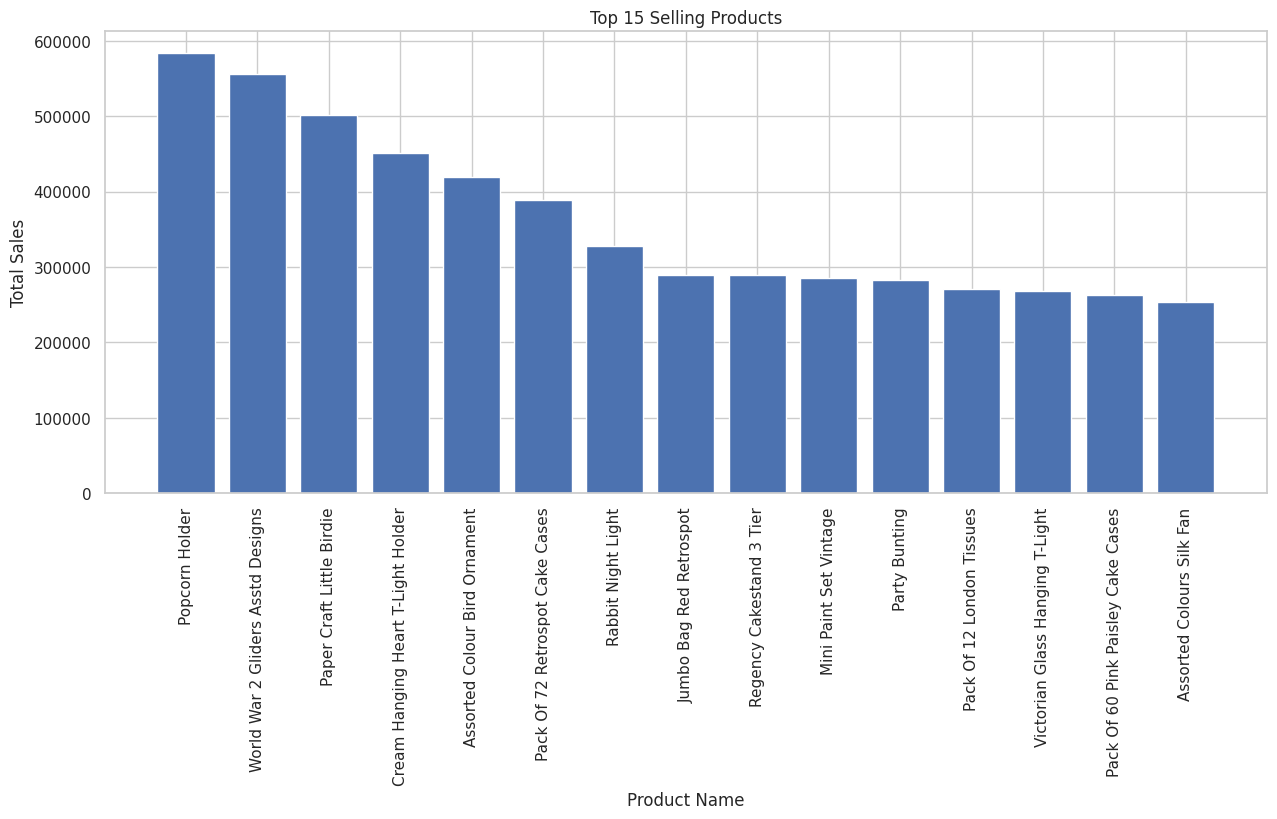

In [ ]:
# Find top 15 Products that have been sold the most

product_sales = sale.groupby("ProductName")["TotalSale"].sum().reset_index()

product_sales = product_sales.sort_values(by="TotalSale", ascending=False)

top_products = product_sales.head(15)

plt.figure(figsize=(15, 6))
plt.bar(top_products["ProductName"], top_products["TotalSale"])
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.title("Top 15 Selling Products")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Find top 15 Products that have been sold the most

top_selling_products = sale.groupby("ProductName")["Quantity"].sum().reset_index()

top_selling_products = top_selling_products.sort_values(by="Quantity", ascending=False)

top_selling_products = top_selling_products.head(15)


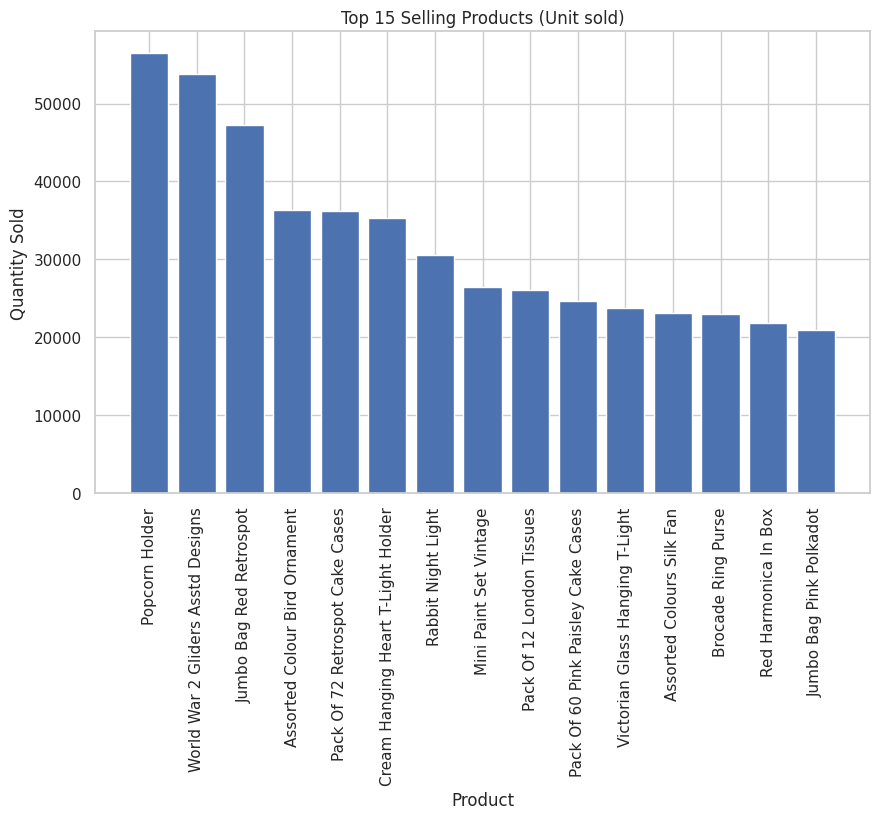

In [ ]:

plt.figure(figsize=(10, 6))
plt.bar(top_selling_products["ProductName"], top_selling_products["Quantity"])
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.title("Top 15 Selling Products (Unit sold)")
plt.xticks(rotation=90)

plt.show()


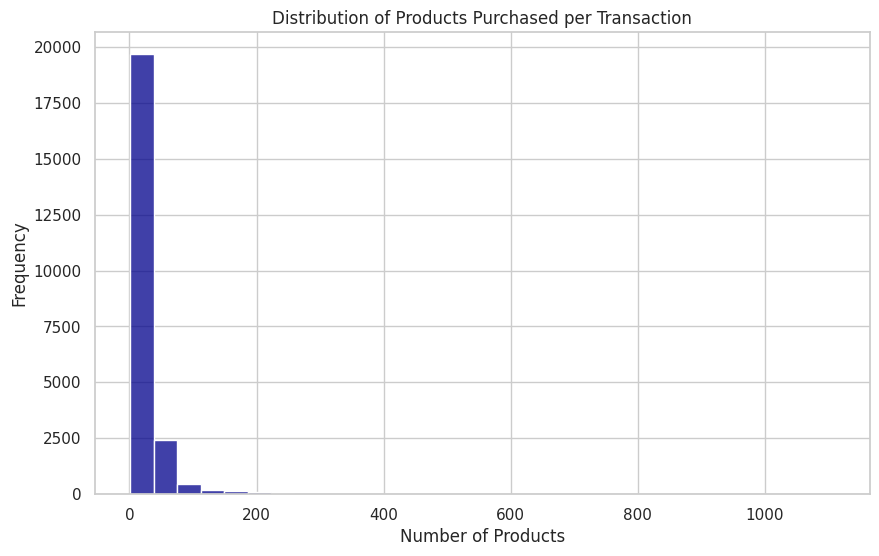

In [ ]:
# Step 1: Group the data by TransactionNo and count the number of products in each transaction
transaction_counts = sale.groupby('TransactionNo')['ProductNo'].count()

# Step 2: Visualize the distribution of the number of products purchased per transaction
plt.figure(figsize=(10, 6))
sns.histplot(transaction_counts, bins=30, kde=False, color='darkblue')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.title('Distribution of Products Purchased per Transaction')
plt.show()

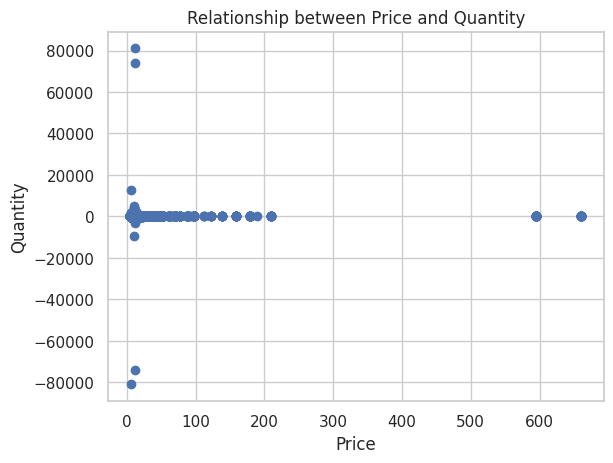

In [ ]:
#find relationship between Price and Quantity?

plt.scatter(sale['Price'], sale['Quantity'])

plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Relationship between Price and Quantity')
plt.show()


In [ ]:
# Import pandas library
import pandas as pd

# Create a DataFrame to store the data
scatter_data = pd.DataFrame({'Price': sale['Price'], 'Quantity': sale['Quantity']})

# Print the DataFrame
scatter_data

,Price,Quantity
0,21.47,12
1,10.65,36
2,11.53,12
3,10.65,12
4,11.94,6
...,...,...
536345,18.96,-2
536346,14.09,-3
536347,11.74,-1
536348,16.35,-4


In [ ]:
import plotly.express as px

sampled_data = sale.sample(n=100000)

fig = px.scatter(sampled_data, x='Price', y='Quantity', title='Price vs Quantity',
                 labels={'Price': 'Price', 'Quantity': 'Quantity'})

fig.update_layout(title='Scatter Plot: Price vs Quantity',
    xaxis_range=[0, 100],
    yaxis_range=[0, 1000])

fig.show()


# **Sell Trend Analysis**

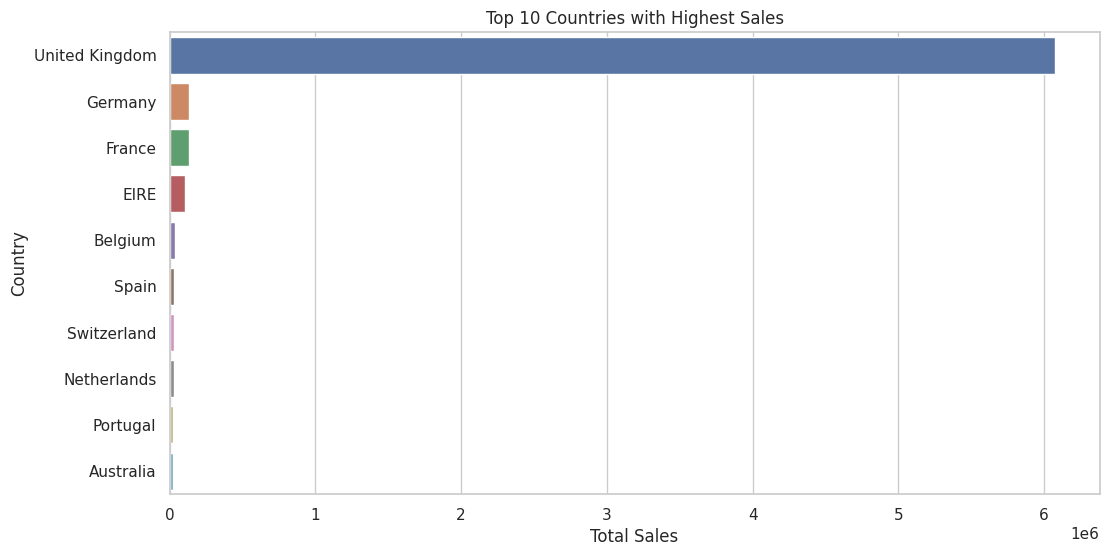

In [ ]:
# Group data by country and calculate total sales for each country
sales_by_country = sale.groupby('Country')['Price'].sum().reset_index()

# Sort countries by total sales in descending order
sales_by_country = sales_by_country.sort_values(by='Price', ascending=False)

# Visualize top 10 countries with highest sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='Country', data=sales_by_country.head(10))
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Sales')
plt.show()


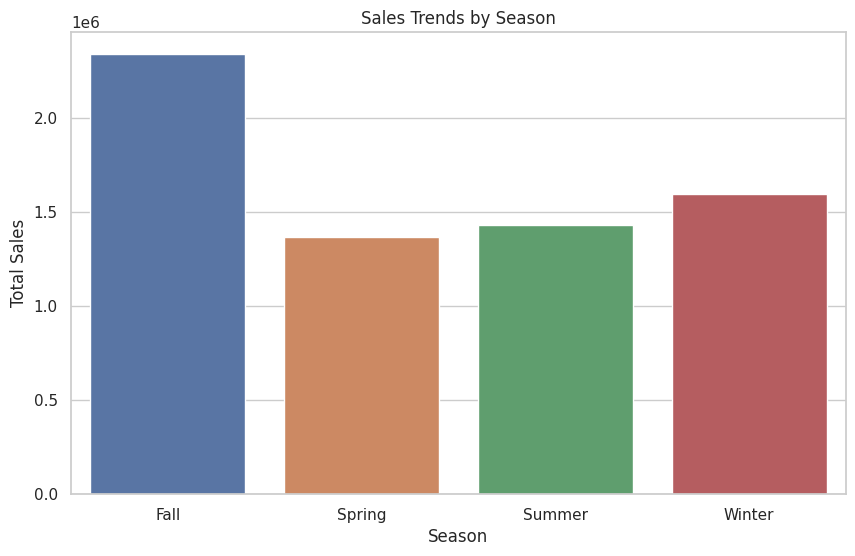

In [ ]:
# Step 1: Group data by Season and calculate total sales for each season
seasonal_sales = sale.groupby('Season')['Price'].sum()

# Step 2: Visualize Sales Trends by Season using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values)
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.title('Sales Trends by Season')
plt.show()

In [ ]:
# Group and calculate transactions per Month

sales_by_month = sale.groupby("Month").agg({"TransactionNo": "count", "TotalSale": "sum"}).reset_index()


sales_by_month = sales_by_month.rename(columns={"TransactionNo": "Number of Transactions", "TotalSale": "Total Sales Amount"})


sales_by_month

,Month,Number of Transactions,Total Sales Amount
0,1,34526,3638948.12
1,2,27169,3292324.69
2,3,35926,4340035.60
3,4,29234,3406002.17
4,5,36307,4521986.96
5,6,36160,4404297.96
6,7,38773,4501972.15
7,8,34703,4609655.77
8,9,49389,6529427.35
9,10,59365,6965035.30


<ipython-input-188-bd8e894bbadc>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



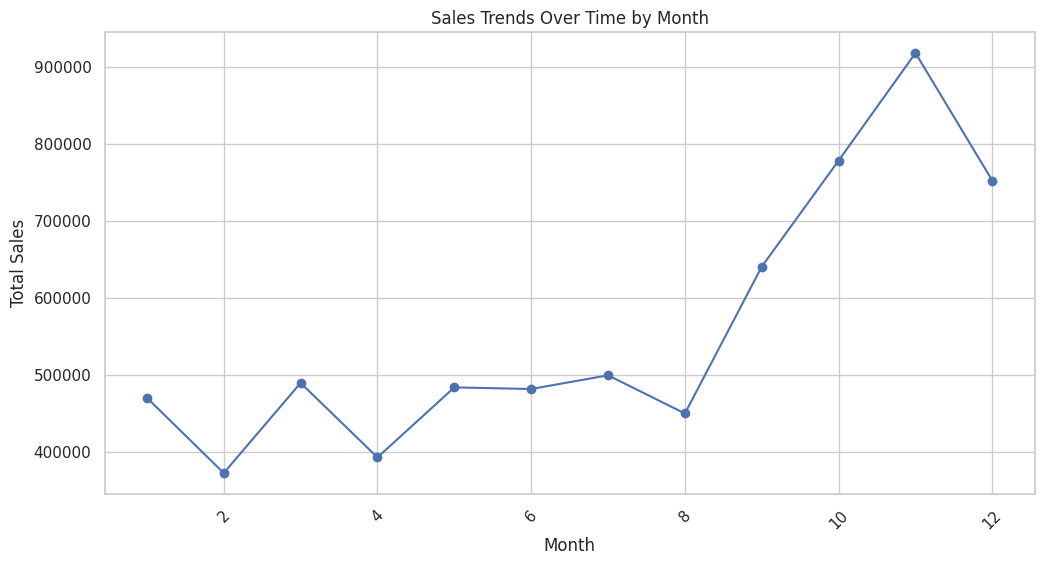

In [ ]:
# Grouping sales data by month and calculating total sales for each month
monthly_sales = sale.groupby(sale['Month']).sum()

# Plotting the sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Price'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Trends Over Time by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Grouping sales data by month and calculating total sales for each month
monthly_sales = sale.groupby(sale['Month']).sum()

# Creating a DataFrame for the sales_by_month graph output
sales_by_month_df = pd.DataFrame({'Month': monthly_sales.index, 'Total Sales': monthly_sales['Price']})

# Displaying the DataFrame
print(sales_by_month_df)


       Month  Total Sales
Month                    
1          1    470338.87
2          2    372752.07
3          3    489598.18
4          4    393012.77
5          5    483825.19
6          6    481747.10
7          7    499506.47
8          8    449982.12
9          9    640475.32
10        10    778051.29
11        11    917501.65
12        12    751988.98


<ipython-input-189-4c023fe320b7>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
# Convert the "Date" column to DateTime
sale.loc["Date"] = pd.to_datetime(sale["Date"])


<ipython-input-190-881090fa3c74>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Find Total Sales Amount group by date

sales_trends = sale.groupby("Date").agg({"TransactionNo": "count", "Price": "sum"}).reset_index()

sales_trends = sales_trends.rename(columns={"TransactionNo": "Number of Transactions", "Price": "Total Sales Amount"})

sales_trends

,Date,Number of Transactions,Total Sales Amount
0,2018-12-01,3039,42393.91
1,2018-12-02,2060,28106.0
2,2018-12-03,2133,30746.38
3,2018-12-05,2604,33995.11
4,2018-12-06,3801,53359.35
...,...,...,...
300,2019-12-05,5280,35651.69
301,2019-12-06,3317,21452.18
302,2019-12-07,2380,15119.96
303,2019-12-08,4895,31166.17


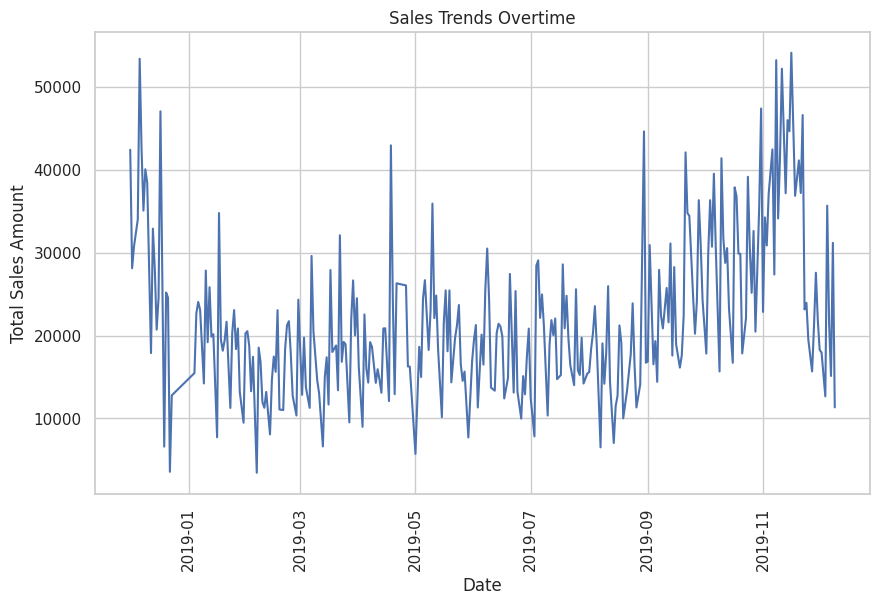

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(sales_trends["Date"], sales_trends["Total Sales Amount"])
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.title("Sales Trends Overtime")
plt.xticks(rotation=90)

plt.show()

#hmm a little bit mess up so I decied to improve this graph

In [ ]:
# Convert Date again and create new Month column

sale["Date"] = pd.to_datetime(sale["Date"])
sale.loc[:, "Month"] = sale["Date"].dt.month

sale


<ipython-input-193-aacd6026ab32>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-193-aacd6026ab32>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-193-aacd6026ab32>:4: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Season,TotalSale
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,12.0,2019,Winter,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,12.0,2019,Winter,383.4
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,12.0,2019,Winter,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,12.0,2019,Winter,127.8
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,12.0,2019,Winter,71.64
...,...,...,...,...,...,...,...,...,...,...,...,...
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,12.0,2018,Winter,-42.27
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,12.0,2018,Winter,-11.74
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,12.0,2018,Winter,-65.4
536349,C536548,2018-12-01,22767,Triple Photo Frame Cornice,20.45,-2,12472.0,Germany,12.0,2018,Winter,-40.9


In [ ]:
# Deep down with transaction type to see how many cancel order and normal order

sale["TransactionType"] = "Normal"
sale.loc[sale["TotalSale"] < 0, "TransactionType"] = "Cancel"

sale

<ipython-input-194-952cedbc70ad>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Season,TotalSale,TransactionType
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,12.0,2019,Winter,257.64,Normal
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,12.0,2019,Winter,383.4,Normal
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,12.0,2019,Winter,138.36,Normal
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,12.0,2019,Winter,127.8,Normal
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,12.0,2019,Winter,71.64,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,12.0,2018,Winter,-42.27,Cancel
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,12.0,2018,Winter,-11.74,Cancel
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,12.0,2018,Winter,-65.4,Cancel
536349,C536548,2018-12-01,22767,Triple Photo Frame Cornice,20.45,-2,12472.0,Germany,12.0,2018,Winter,-40.9,Cancel


In [ ]:
sale = sale.iloc[:-1]
sale

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Season,TotalSale,TransactionType
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,12.0,2019,Winter,257.64,Normal
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,12.0,2019,Winter,383.4,Normal
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,12.0,2019,Winter,138.36,Normal
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,12.0,2019,Winter,127.8,Normal
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,12.0,2019,Winter,71.64,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,12.0,2018,Winter,-37.92,Cancel
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,12.0,2018,Winter,-42.27,Cancel
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,12.0,2018,Winter,-11.74,Cancel
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,12.0,2018,Winter,-65.4,Cancel


In [ ]:
new_sales_by_month = sale.groupby(["Month", "TransactionType"]).agg({"TransactionNo": "count", "TotalSale": "sum"}).reset_index()

new_sales_by_month = new_sales_by_month.rename(columns={"TransactionNo": "Number of Transactions", "TotalSale": "Total Sales Amount"})

print(new_sales_by_month)


    Month TransactionType  Number of Transactions Total Sales Amount
0     1.0          Cancel                     666         -909475.35
1     1.0          Normal                   33860         4548423.47
2     2.0          Cancel                     410          -35017.95
3     2.0          Normal                   26759         3327342.64
4     3.0          Cancel                     608          -44634.22
5     3.0          Normal                   35318         4384669.82
6     4.0          Cancel                     527         -173307.89
7     4.0          Normal                   28707         3579310.06
8     5.0          Cancel                     551          -47965.25
9     5.0          Normal                   35756         4569952.21
10    6.0          Cancel                     627          -81752.19
11    6.0          Normal                   35533         4486050.15
12    7.0          Cancel                     635          -69522.73
13    7.0          Normal         

In [ ]:

# Convert to postive value for creating visulization
new_sales_by_month["Total Sales Amount"] = np.abs(new_sales_by_month["Total Sales Amount"])

print(new_sales_by_month)


    Month TransactionType  Number of Transactions Total Sales Amount
0     1.0          Cancel                     666          909475.35
1     1.0          Normal                   33860         4548423.47
2     2.0          Cancel                     410           35017.95
3     2.0          Normal                   26759         3327342.64
4     3.0          Cancel                     608           44634.22
5     3.0          Normal                   35318         4384669.82
6     4.0          Cancel                     527          173307.89
7     4.0          Normal                   28707         3579310.06
8     5.0          Cancel                     551           47965.25
9     5.0          Normal                   35756         4569952.21
10    6.0          Cancel                     627           81752.19
11    6.0          Normal                   35533         4486050.15
12    7.0          Cancel                     635           69522.73
13    7.0          Normal         

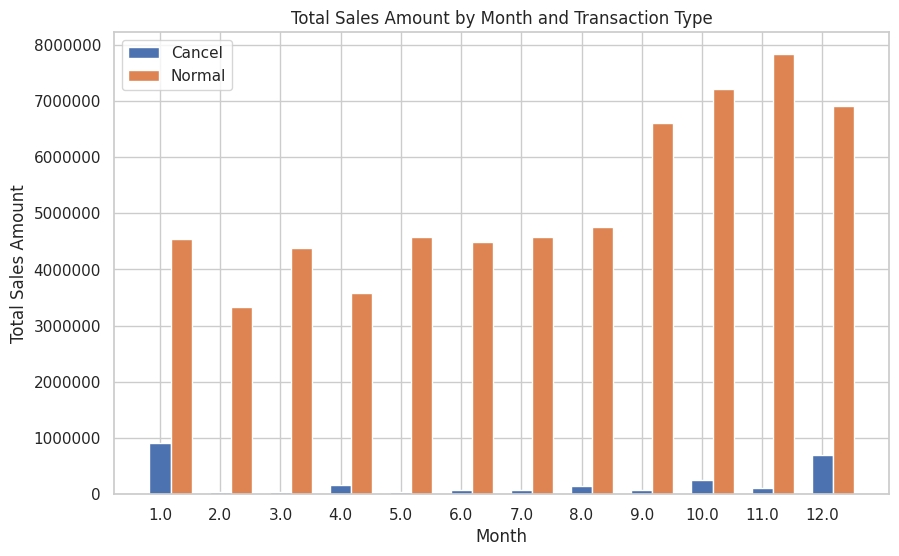

In [ ]:
months = new_sales_by_month["Month"].unique()
transaction_types = new_sales_by_month["TransactionType"].unique()

bar_positions = np.arange(len(months))

bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))


for i, transaction_type in enumerate(transaction_types):

    data = new_sales_by_month[new_sales_by_month["TransactionType"] == transaction_type]

    sales_amount = data.groupby("Month")["Total Sales Amount"].sum()

    ax.bar(bar_positions + i * bar_width, sales_amount, width=bar_width, label=transaction_type)


ax.set_xlabel("Month")
ax.set_ylabel("Total Sales Amount")
ax.set_title("Total Sales Amount by Month and Transaction Type")
ax.set_xticks(bar_positions)
ax.set_xticklabels(months)
ax.legend()

plt.ticklabel_format(style='plain', axis='y', useOffset=False)

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined 'new_sales_by_month' DataFrame

months = new_sales_by_month["Month"].unique()
transaction_types = new_sales_by_month["TransactionType"].unique()

bar_positions = np.arange(len(months))
bar_width = 0.35

# Create an empty list to store data for the DataFrame
data_list = []

for i, transaction_type in enumerate(transaction_types):
    data = new_sales_by_month[new_sales_by_month["TransactionType"] == transaction_type]
    sales_amount = data.groupby("Month")["Total Sales Amount"].sum()

    # Append the data for each transaction type to the list
    for month, amount in sales_amount.items():
        data_list.append([month, transaction_type, amount])

# Create the DataFrame
sales_by_month_df = pd.DataFrame(data_list, columns=["Month", "TransactionType", "Total Sales Amount"])

# Display the DataFrame
print(sales_by_month_df)


    Month TransactionType  Total Sales Amount
0     1.0          Cancel        9.094753e+05
1     2.0          Cancel        3.501795e+04
2     3.0          Cancel        4.463422e+04
3     4.0          Cancel        1.733079e+05
4     5.0          Cancel        4.796525e+04
5     6.0          Cancel        8.175219e+04
6     7.0          Cancel        6.952273e+04
7     8.0          Cancel        1.401455e+05
8     9.0          Cancel        8.434544e+04
9    10.0          Cancel        2.472445e+05
10   11.0          Cancel        1.155836e+05
11   12.0          Cancel        6.977206e+05
12    1.0          Normal        4.548423e+06
13    2.0          Normal        3.327343e+06
14    3.0          Normal        4.384670e+06
15    4.0          Normal        3.579310e+06
16    5.0          Normal        4.569952e+06
17    6.0          Normal        4.486050e+06
18    7.0          Normal        4.571495e+06
19    8.0          Normal        4.749801e+06
20    9.0          Normal        6

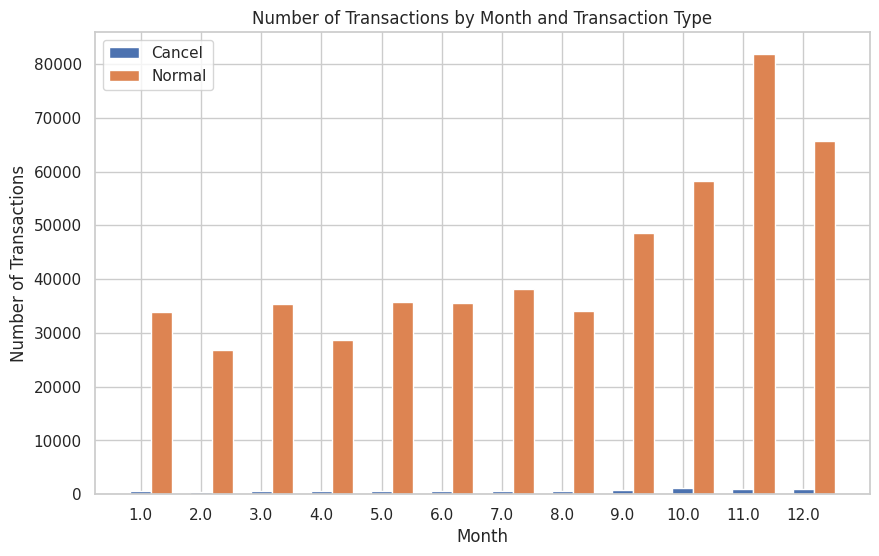

In [ ]:
months = new_sales_by_month["Month"].unique()
transaction_types = new_sales_by_month["TransactionType"].unique()

bar_positions = np.arange(len(months))

bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))


for i, transaction_type in enumerate(transaction_types):

    data = new_sales_by_month[new_sales_by_month["TransactionType"] == transaction_type]

    sales_amount = data.groupby("Month")["Number of Transactions"].sum()

    ax.bar(bar_positions + i * bar_width, sales_amount, width=bar_width, label=transaction_type)


ax.set_xlabel("Month")
ax.set_ylabel("Number of Transactions")
ax.set_title("Number of Transactions by Month and Transaction Type")
ax.set_xticks(bar_positions)
ax.set_xticklabels(months)
ax.legend()

plt.ticklabel_format(style='plain', axis='y', useOffset=False)

plt.show()


# **Customer Analysis**

In [ ]:
total_unique_customers = len(sale["CustomerNo"].unique())

print("Total_Customer:",total_unique_customers)

Total_Customer: 4738


In [ ]:
total_unique_customer_country = len(sale["Country"].unique())

print("Total_Customer_Country:",total_unique_customer_country)

Total_Customer_Country: 38


In [ ]:
average_transactions_per_customer = sale.groupby("CustomerNo")["TransactionNo"].count().mean()

print("Avg_Trans:", average_transactions_per_customer)


Avg_Trans: 112.0926551287463


In [ ]:
# Find total sale per customer and order by DESC
total_sales_per_customer = sale.groupby("CustomerNo")["TotalSale"].sum().sort_values(ascending=False)

print(total_sales_per_customer)

CustomerNo
14646.0    2108959.95
18102.0     897137.36
12415.0     895267.24
17450.0     876447.01
14911.0     872608.57
              ...    
17548.0       -1498.2
17307.0      -1632.96
16742.0      -1714.91
16252.0      -1921.72
14213.0      -3722.46
Name: TotalSale, Length: 4738, dtype: object


In [ ]:
#Find customer that mostly buy from our store

frequency_of_buying = sale.groupby("CustomerNo")["TransactionNo"].nunique().sort_values(ascending=False)

print(frequency_of_buying)


CustomerNo
14911.0    241
12748.0    218
17841.0    170
14606.0    125
13089.0    119
          ... 
14437.0      1
16732.0      1
14439.0      1
16727.0      1
12004.0      1
Name: TransactionNo, Length: 4738, dtype: int64


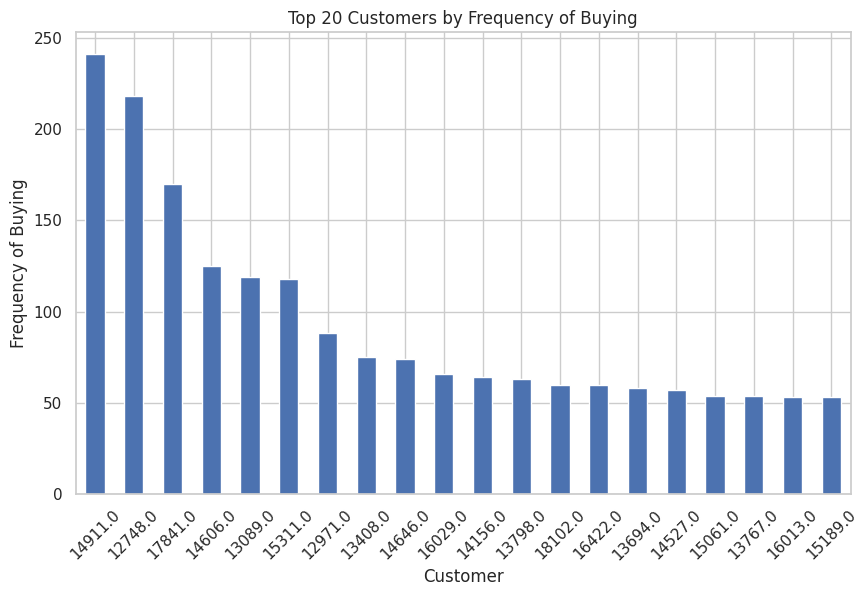

In [ ]:
frequency_of_buying = sale.groupby("CustomerNo")["TransactionNo"].nunique()
top_20_customers = frequency_of_buying.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_20_customers.plot(kind="bar")
plt.xlabel("Customer")
plt.ylabel("Frequency of Buying")
plt.title("Top 20 Customers by Frequency of Buying")
plt.xticks(rotation=45)
plt.show()


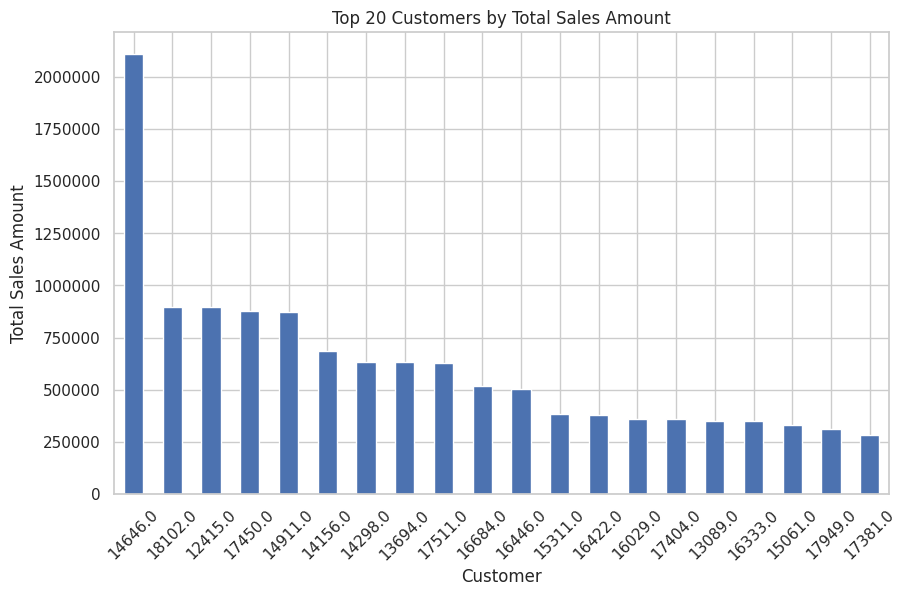

In [ ]:
total_sales_per_customer = sale.groupby("CustomerNo")["TotalSale"].sum()
top_20_customers = total_sales_per_customer.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_20_customers.plot(kind="bar")
plt.xlabel("Customer")
plt.ylabel("Total Sales Amount")
plt.title("Top 20 Customers by Total Sales Amount")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'sale' is the DataFrame containing the sales data

# Grouping sales data by customer and calculating total sales amount for each customer
total_sales_per_customer = sale.groupby("CustomerNo")["TotalSale"].sum()

# Sorting the customers based on total sales amount in descending order and selecting the top 20
top_20_customers = total_sales_per_customer.sort_values(ascending=False).head(20)

# Create a DataFrame from the top 20 customers' data
top_20_customers_df = pd.DataFrame({"Customer": top_20_customers.index, "Total Sales Amount": top_20_customers.values})

# Display the DataFrame
print(top_20_customers_df)


    Customer Total Sales Amount
0    14646.0         2108959.95
1    18102.0          897137.36
2    12415.0          895267.24
3    17450.0          876447.01
4    14911.0          872608.57
5    14156.0          683106.77
6    14298.0          633533.19
7    13694.0          631971.98
8    17511.0          627685.41
9    16684.0          518976.78
10   16446.0          501382.52
11   15311.0          385548.04
12   16422.0          379430.63
13   16029.0           361289.7
14   17404.0          360096.48
15   13089.0          349979.58
16   16333.0          349966.24
17   15061.0          330795.98
18   17949.0          313941.05
19   17381.0          281908.66


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'sale' is the DataFrame containing sales data
total_sales_per_customer = sale.groupby("CustomerNo")["TotalSale"].sum()
top_20_customers = total_sales_per_customer.sort_values(ascending=False).head(20)

# Creating a DataFrame for the graph
df_top_20_customers = pd.DataFrame(top_20_customers)
df_top_20_customers.reset_index(inplace=True)
df_top_20_customers.rename(columns={"CustomerNo": "Customer", "TotalSale": "Total Sales Amount"}, inplace=True)

df_top_20_customers

,Customer,Total Sales Amount
0,14646.0,2108959.95
1,18102.0,897137.36
2,12415.0,895267.24
3,17450.0,876447.01
4,14911.0,872608.57
5,14156.0,683106.77
6,14298.0,633533.19
7,13694.0,631971.98
8,17511.0,627685.41
9,16684.0,518976.78


# We can gain valuable insights from two key points:

1. Identifying customers who make large purchases: By analyzing customer data, we can identify those individuals who consistently make significant purchases. These customers are valuable for businesses as they contribute to a substantial portion of sales revenue.

2. Recognizing frequent buyers: It is essential to identify customers who make purchases frequently, even if the individual transaction amounts are relatively small. These customers, despite their lower individual purchase amounts, contribute to overall sales volume and can be loyal supporters of the business.


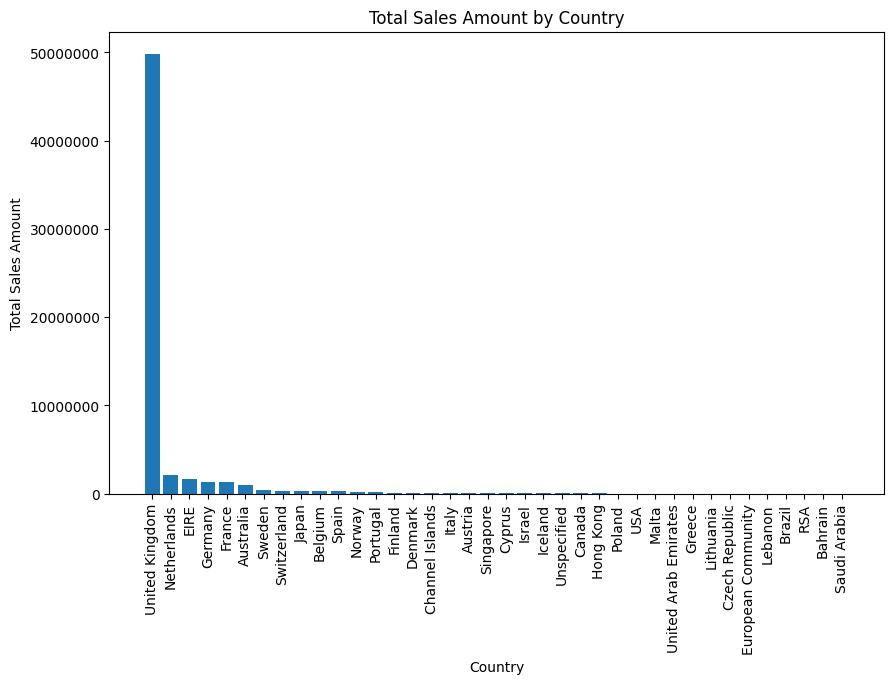

In [ ]:
customer_sales_by_country = sale.groupby("Country")["TotalSale"].sum().reset_index()

customer_sales_by_country = customer_sales_by_country.sort_values(by="TotalSale", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(customer_sales_by_country["Country"], customer_sales_by_country["TotalSale"])
plt.xlabel("Country")
plt.ylabel("Total Sales Amount")
plt.title("Total Sales Amount by Country")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()


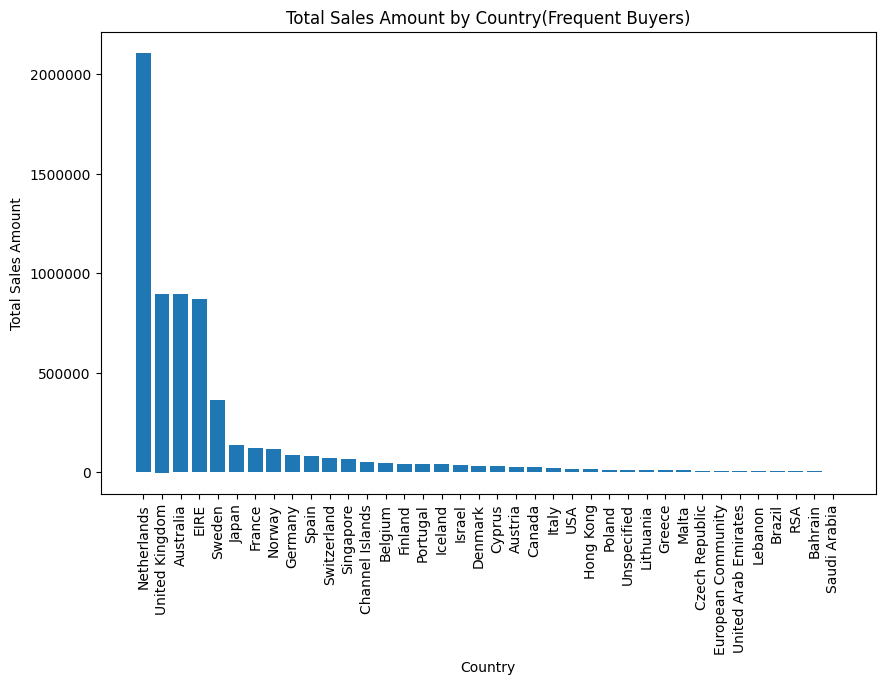

In [ ]:
customer_sales_by_country = sale.groupby(["CustomerNo", "Country"])["TotalSale"].sum().reset_index()

customer_sales_by_country = customer_sales_by_country.sort_values(by="TotalSale", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(customer_sales_by_country["Country"], customer_sales_by_country["TotalSale"])
plt.xlabel("Country")
plt.ylabel("Total Sales Amount")
plt.title("Total Sales Amount by Country(Frequent Buyers)")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping sales data by CustomerNo and Country and calculating total sales for each combination
customer_sales_by_country = sale.groupby(["CustomerNo", "Country"])["TotalSale"].sum().reset_index()

# Sorting the DataFrame by total sales amount in descending order
customer_sales_by_country = customer_sales_by_country.sort_values(by="TotalSale", ascending=False)

# Creating the DataFrame
print("DataFrame for Total Sales Amount by Country (Frequent Buyers):")
customer_sales_by_country


DataFrame for Total Sales Amount by Country (Frequent Buyers):


,CustomerNo,Country,TotalSale
1887,14646.0,Netherlands,2108959.95
4599,18102.0,United Kingdom,897137.36
126,12415.0,Australia,895267.24
4098,17450.0,United Kingdom,876447.01
2093,14911.0,EIRE,872608.57
...,...,...,...
4175,17548.0,United Kingdom,-1498.2
3982,17307.0,United Kingdom,-1632.96
3548,16742.0,United Kingdom,-1714.91
3169,16252.0,United Kingdom,-1921.72


In [ ]:
customer_sales_by_country = sale.groupby(["CustomerNo", "Country"])["TotalSale"].sum().reset_index().sort_values(by="TotalSale", ascending=False)

customer_sales_by_country

,CustomerNo,Country,TotalSale
1887,14646.0,Netherlands,2108959.95
4599,18102.0,United Kingdom,897137.36
126,12415.0,Australia,895267.24
4098,17450.0,United Kingdom,876447.01
2093,14911.0,EIRE,872608.57
...,...,...,...
4175,17548.0,United Kingdom,-1498.2
3982,17307.0,United Kingdom,-1632.96
3548,16742.0,United Kingdom,-1714.91
3169,16252.0,United Kingdom,-1921.72


In [ ]:
customer_sales_country = sale.groupby("Country")["TotalSale"].sum().reset_index().sort_values(by="TotalSale", ascending=False)
customer_sales_country

,Country,TotalSale
36,United Kingdom,49855388.839984
24,Netherlands,2147811.39
10,EIRE,1659053.51
14,Germany,1348561.75
13,France,1316144.75
0,Australia,988562.45
32,Sweden,396042.61
33,Switzerland,358146.32
20,Japan,283293.47
3,Belgium,271346.98


## Based on the available data, it appears that the country where customers make the highest total purchases is the UK. However, when considering the country with customers who make the highest payments individually, the Netherlands stands out.

In [ ]:
max_cus_per_country = sale.groupby(["CustomerNo", "Country"])["TransactionNo"].nunique().reset_index().sort_values(by="TransactionNo", ascending=False)

max_cus_per_country

,CustomerNo,Country,TransactionNo
2093,14911.0,EIRE,241
409,12748.0,United Kingdom,218
4402,17841.0,United Kingdom,170
1857,14606.0,United Kingdom,125
670,13089.0,United Kingdom,119
...,...,...,...
1724,14437.0,United Kingdom,1
3542,16732.0,United Kingdom,1
1726,14439.0,Greece,1
3538,16727.0,United Kingdom,1


In [ ]:
transactions_per_customer_per_country = sale.groupby(["CustomerNo", "Country"])["TransactionNo"].count().reset_index().sort_values(by="TransactionNo", ascending=False)

print(transactions_per_customer_per_country)


      CustomerNo         Country  TransactionNo
4402     17841.0  United Kingdom           7803
2093     14911.0            EIRE           5794
1463     14096.0  United Kingdom           5093
409      12748.0  United Kingdom           4456
1857     14606.0  United Kingdom           2751
...          ...             ...            ...
1939     14705.0  United Kingdom              1
3033     16093.0  United Kingdom              1
2502     15423.0  United Kingdom              1
4627     18141.0  United Kingdom              1
442      12791.0     Netherlands              1

[4738 rows x 3 columns]


In [ ]:
import plotly.graph_objects as go

# Convert the "Price" column to numeric if it's not already
sale["Price"] = pd.to_numeric(sale["Price"], errors="coerce")

# Calculate total sales amount per country
total_sales_per_country = sale.groupby("Country")["Price"].sum()
top_10_countries = total_sales_per_country.nlargest(10)

fig = go.Figure(data=[go.Pie(labels=top_10_countries.index, values=top_10_countries)])

fig.update_layout(title_text="Total Sales Amount by Country (Top 10)")

fig.show()


<ipython-input-66-e65cee023685>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
filtered_data = sale[sale["Country"] != "United Kingdom"]
filtered_data["Total Sales Amount"] = pd.to_numeric(filtered_data["TotalSale"])
total_sales_per_country = filtered_data.groupby("Country")["Total Sales Amount"].sum()
top_10_countries = total_sales_per_country.nlargest(10)

fig = go.Figure(data=[go.Pie(labels=top_10_countries.index, values=top_10_countries)])

fig.update_layout(title_text="Total Sales Amount by Country (Top 10) Without UK")

fig.show()

# Let's filter out the UK from the analysis since we already know it holds the top position in terms of total purchases.
#This will allow us to focus on the rankings of other countries.

<ipython-input-67-f7d836922089>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Model Building & Training

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

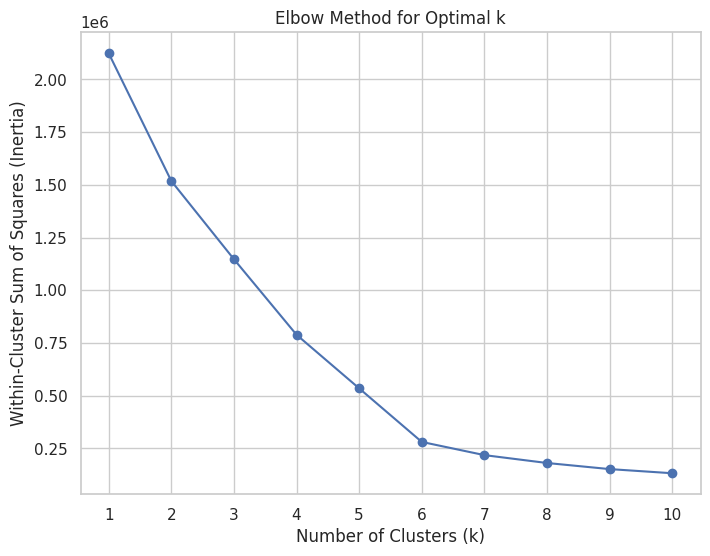

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have already loaded the 'sale' dataset with the modified columns

# Select features for clustering
selected_features = ['Price', 'Quantity', 'Month', 'Year']

# Create a new dataframe 'X' with the selected features
X = sale[selected_features]

# Standardize the features to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
max_clusters = 10  # You can adjust this value based on your dataset

for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters+1), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, max_clusters+1))
plt.grid(True)
plt.show()


In [222]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming you have already loaded the 'sale' dataset with the modified columns

# Select features for clustering
selected_features = ['Price', 'Quantity', 'Month', 'Year']

# Create a new dataframe 'X' with the selected features
X = sale[selected_features]

# Standardize the features to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (can be determined using techniques like Elbow Method)
num_clusters = 4

# Apply K-Means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

# View the clusters assigned to each data point
print(X['Cluster'].value_counts())

# Now 'X' contains the selected features and the cluster labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0    288264
2    201210
1     41549
3        72
Name: Cluster, dtype: int64


<ipython-input-222-781057837ac5>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Model Evaluation

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming you already have the 'X' dataframe with the selected features and cluster labels
# and 'kmeans' is the already trained K-Means clustering model

# Get the cluster labels assigned to each data point
cluster_labels = X['Cluster']

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5590633544884359


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming you already have the 'X' dataframe with the selected features and cluster labels
# and 'kmeans' is the already trained K-Means clustering model

# Get the cluster labels assigned to each data point
cluster_labels = X['Cluster']

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate the Inertia
inertia = kmeans.inertia_

# Calculate the Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X_scaled, cluster_labels)

print(f"Inertia: {inertia}")
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Inertia: 789216.7190746649
Davies-Bouldin Index: 0.4199939410724165


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

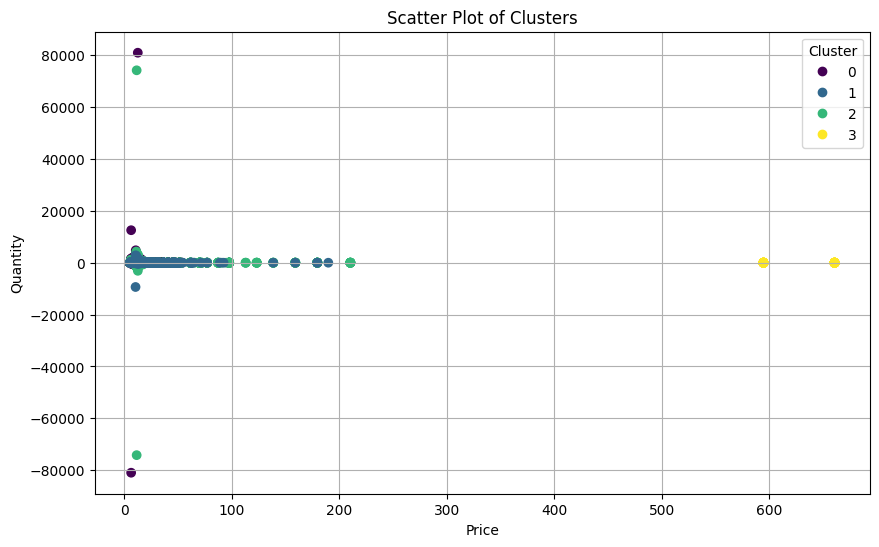

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded the 'sale' dataset with the modified columns

# Select features for clustering
selected_features = ['Price', 'Quantity', 'Month', 'Year']

# Create a new dataframe 'X' with the selected features
X = sale[selected_features]

# Standardize the features to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia_values = []
k_range = range(1, 11)  # Trying k from 1 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Choose the number of clusters (can be determined using techniques like Elbow Method)
num_clusters = 4

# Apply K-Means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

# Create a scatter plot to visualize the data points and their clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Price'], X['Quantity'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Scatter Plot of Clusters')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.grid(True)
plt.show()


In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded the 'sale' dataset with the modified columns

# Select features for clustering
selected_features = ['Price', 'Quantity', 'Month', 'Year']

# Create a new dataframe 'X' with the selected features
X = sale[selected_features]

# Standardize the features to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (can be determined using techniques like Elbow Method)
num_clusters = 4

# Apply K-Means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

# Print the DataFrame to display the cluster labels for each data point
print(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



        Price Quantity  Month  Year  Cluster
0       21.47       12   12.0  2019        0
1       10.65       36   12.0  2019        0
2       11.53       12   12.0  2019        0
3       10.65       12   12.0  2019        0
4       11.94        6   12.0  2019        0
...       ...      ...    ...   ...      ...
536345  18.96       -2   12.0  2018        1
536346  14.09       -3   12.0  2018        1
536347  11.74       -1   12.0  2018        1
536348  16.35       -4   12.0  2018        1
536349  20.45       -2   12.0  2018        1

[531095 rows x 5 columns]


<ipython-input-225-eda7ea7ceb80>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Clusters Interpretation

In [ ]:
# Customer Analysis for all 4 Clusters
# Let's assume 'sale' is the original dataset containing all columns

# Merge the cluster labels back to the original 'sale' dataset
sale['Cluster'] = X['Cluster']

# Group the data by 'Cluster' and calculate various customer metrics
customer_analysis = sale.groupby('Cluster').agg({
    'Price': ['mean', 'min', 'max'],
    'Quantity': ['mean', 'min', 'max'],
    'TotalSale': 'sum',
    'CustomerNo': 'nunique',
    'TransactionNo': 'count'
}).reset_index()

# Rename the columns for better understanding
customer_analysis.columns = ['Cluster', 'Avg_Price', 'Min_Price', 'Max_Price', 'Avg_Quantity', 'Min_Quantity', 'Max_Quantity', 'Total_Sales', 'Unique_Customers', 'Total_Transactions']

# Display the customer analysis for all clusters
customer_analysis


<ipython-input-73-ea76f7b66e92>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cluster,Avg_Price,Min_Price,Max_Price,Avg_Quantity,Min_Quantity,Max_Quantity,Total_Sales,Unique_Customers,Total_Transactions
0,0,11.755525,5.13,97.37,10.179859,-80995,80995,32185756.029995,3603,288264
1,1,13.954574,5.13,189.62,8.220824,-9360,2880,4205390.37,1085,41549
2,2,13.494531,5.13,210.12,10.094856,-74215,74215,23699050.829997,3261,201210
3,3,625.723333,594.50,660.62,0.972222,-2,2,44392.04,41,72


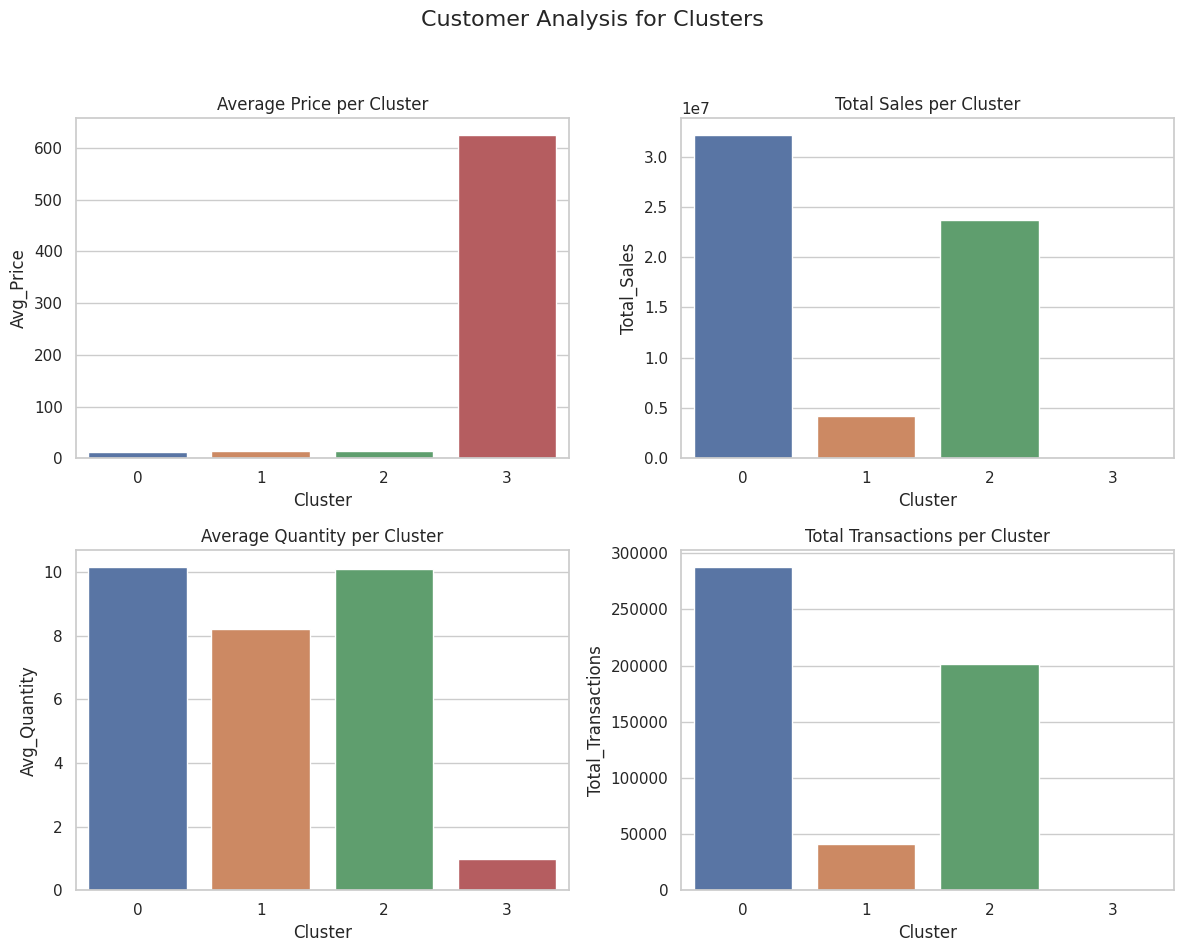

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already performed customer analysis and have the 'customer_analysis' DataFrame

# Set style for Seaborn plots (optional but makes the plots look better)
sns.set(style="whitegrid")

# Create subplots to display multiple plots together
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Customer Analysis for Clusters", fontsize=16)

# Plot 1 - Average Price per Cluster
sns.barplot(x='Cluster', y='Avg_Price', data=customer_analysis, ax=axes[0, 0])
axes[0, 0].set_title("Average Price per Cluster")

# Plot 2 - Total Sales per Cluster
sns.barplot(x='Cluster', y='Total_Sales', data=customer_analysis, ax=axes[0, 1])
axes[0, 1].set_title("Total Sales per Cluster")

# Plot 3 - Average Quantity per Cluster
sns.barplot(x='Cluster', y='Avg_Quantity', data=customer_analysis, ax=axes[1, 0])
axes[1, 0].set_title("Average Quantity per Cluster")

# Plot 4 - Total Transactions per Cluster
sns.barplot(x='Cluster', y='Total_Transactions', data=customer_analysis, ax=axes[1, 1])
axes[1, 1].set_title("Total Transactions per Cluster")

# Adjust layout to avoid overlapping titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()


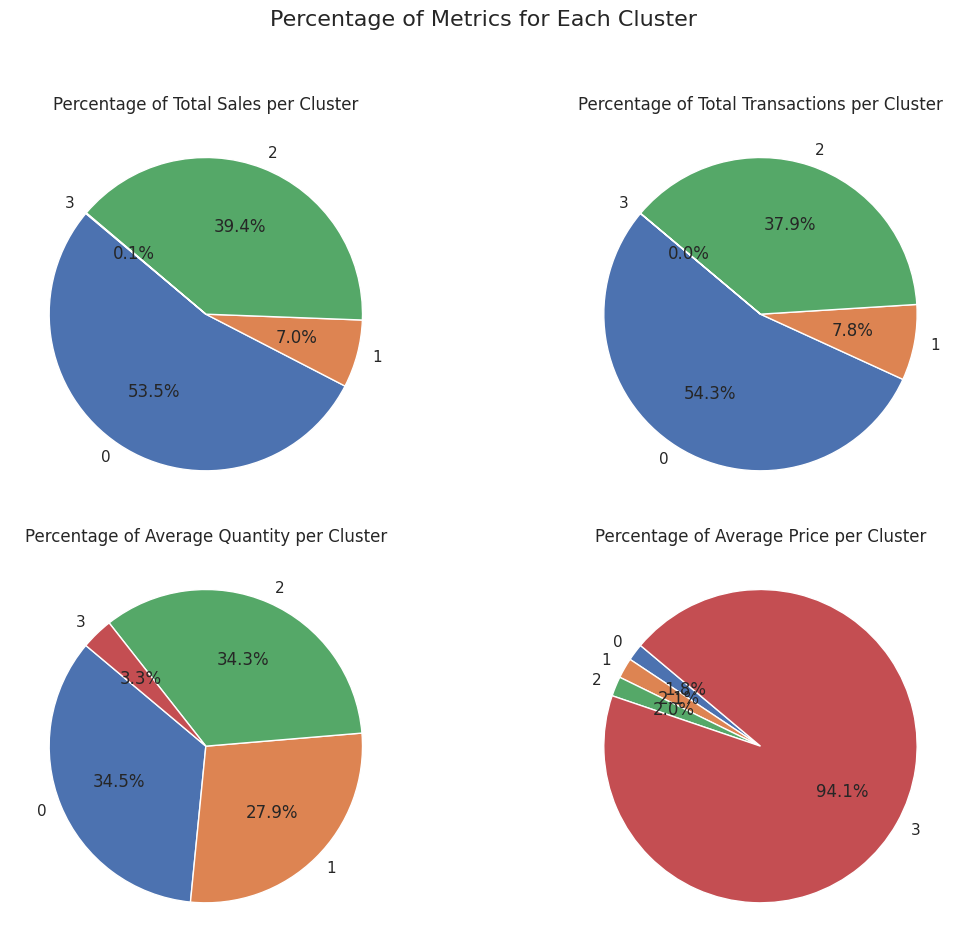

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already performed customer analysis and have the 'customer_analysis' DataFrame

# Calculate the total sales, total transactions, average quantity, and average price for all clusters
total_sales = customer_analysis['Total_Sales'].sum()
total_transactions = customer_analysis['Total_Transactions'].sum()
average_quantity = customer_analysis['Avg_Quantity'].mean()
average_price = customer_analysis['Avg_Price'].mean()

# Calculate the percentage of each metric for each cluster
customer_analysis['Percentage_Total_Sales'] = (customer_analysis['Total_Sales'] / total_sales) * 100
customer_analysis['Percentage_Total_Transactions'] = (customer_analysis['Total_Transactions'] / total_transactions) * 100
customer_analysis['Percentage_Avg_Quantity'] = (customer_analysis['Avg_Quantity'] / average_quantity) * 100
customer_analysis['Percentage_Avg_Price'] = (customer_analysis['Avg_Price'] / average_price) * 100

# Set up figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Percentage of Metrics for Each Cluster", fontsize=16)

# Plot 1 - Percentage of Total Sales per Cluster
axes[0, 0].pie(customer_analysis['Percentage_Total_Sales'], labels=customer_analysis['Cluster'], autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title("Percentage of Total Sales per Cluster")

# Plot 2 - Percentage of Total Transactions per Cluster
axes[0, 1].pie(customer_analysis['Percentage_Total_Transactions'], labels=customer_analysis['Cluster'], autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title("Percentage of Total Transactions per Cluster")

# Plot 3 - Percentage of Average Quantity per Cluster
axes[1, 0].pie(customer_analysis['Percentage_Avg_Quantity'], labels=customer_analysis['Cluster'], autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title("Percentage of Average Quantity per Cluster")

# Plot 4 - Percentage of Average Price per Cluster
axes[1, 1].pie(customer_analysis['Percentage_Avg_Price'], labels=customer_analysis['Cluster'], autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title("Percentage of Average Price per Cluster")

# Adjust layout to avoid overlapping titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [ ]:
# Assuming you have already performed K-Means clustering and have the 'sale' dataset with 'Cluster' column

# Create DataFrames for each cluster
cluster_0_df = sale[sale['Cluster'] == 0]
cluster_1_df = sale[sale['Cluster'] == 1]
cluster_2_df = sale[sale['Cluster'] == 2]
cluster_3_df = sale[sale['Cluster'] == 3]

# Display the first few rows of each DataFrame to verify the data
print("Cluster 0 DataFrame:")
cluster_0_df

Cluster 0 DataFrame:


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Season,TotalSale,TransactionType,Cluster
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,12.0,2019,Winter,257.64,Normal,0
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,12.0,2019,Winter,383.4,Normal,0
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,12.0,2019,Winter,138.36,Normal,0
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,12.0,2019,Winter,127.8,Normal,0
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,12.0,2019,Winter,71.64,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293291,C558745,2019-07-01,21314,Small Glass Heart Trinket Pot,12.40,-1,14415.0,United Kingdom,7.0,2019,Summer,-12.4,Cancel,0
293292,C558745,2019-07-01,21733,Red Hanging Heart T-Light Holder,13.27,-1,14415.0,United Kingdom,7.0,2019,Summer,-13.27,Cancel,0
293293,C558745,2019-07-01,21844,Red Retrospot Mug,13.27,-1,14415.0,United Kingdom,7.0,2019,Summer,-13.27,Cancel,0
293294,C558745,2019-07-01,23182,Toilet Sign Occupied Or Vacant,11.10,-1,14415.0,United Kingdom,7.0,2019,Summer,-11.1,Cancel,0


In [ ]:
print("\nCluster 1 DataFrame:")
cluster_1_df


Cluster 1 DataFrame:


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Season,TotalSale,TransactionType,Cluster
494256,539958,2018-12-23,85161,Acrylic Geometric Lamp,49.47,1,13958.0,United Kingdom,12.0,2018,Winter,49.47,Normal,1
494257,539955,2018-12-23,22423,Regency Cakestand 3 Tier,36.38,5,14955.0,United Kingdom,12.0,2018,Winter,181.9,Normal,1
494258,539958,2018-12-23,22423,Regency Cakestand 3 Tier,36.38,2,13958.0,United Kingdom,12.0,2018,Winter,72.76,Normal,1
494259,539958,2018-12-23,22503,Cabin Bag Vintage Paisley,36.38,1,13958.0,United Kingdom,12.0,2018,Winter,36.38,Normal,1
494260,539958,2018-12-23,22760,Tray Breakfast In Bed,36.38,1,13958.0,United Kingdom,12.0,2018,Winter,36.38,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,12.0,2018,Winter,-37.92,Cancel,1
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,12.0,2018,Winter,-42.27,Cancel,1
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,12.0,2018,Winter,-11.74,Cancel,1
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,12.0,2018,Winter,-65.4,Cancel,1


In [ ]:
print("\nCluster 2 DataFrame:")
cluster_2_df


Cluster 2 DataFrame:


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Season,TotalSale,TransactionType,Cluster
62380,577130,2019-11-17,22827,Rustic Seventeen Drawer Sideboard,179.37,1,15861.0,United Kingdom,11.0,2019,Fall,179.37,Normal,2
62381,C577131,2019-11-17,22827,Rustic Seventeen Drawer Sideboard,179.37,-1,15861.0,United Kingdom,11.0,2019,Fall,-179.37,Cancel,2
65961,576635,2019-11-16,22828,Regency Mirror With Shutters,158.88,2,15269.0,United Kingdom,11.0,2019,Fall,317.76,Normal,2
70117,576512,2019-11-15,22823,Chest Natural Wood 20 Drawers,123.00,4,15524.0,United Kingdom,11.0,2019,Fall,492.0,Normal,2
96224,574705,2019-11-06,22827,Rustic Seventeen Drawer Sideboard,179.37,1,14553.0,United Kingdom,11.0,2019,Fall,179.37,Normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494251,C540030,2019-01-04,22070,Small Red Retrospot Mug In Box,14.09,-24,16029.0,United Kingdom,1.0,2019,Winter,-338.16,Cancel,2
494252,C540097,2019-01-04,22835,Hot Water Bottle I Am So Poorly,15.02,-4,15373.0,United Kingdom,1.0,2019,Winter,-60.08,Cancel,2
494253,C540097,2019-01-04,22179,Set 10 Night Owl Lights,17.17,-4,15373.0,United Kingdom,1.0,2019,Winter,-68.68,Cancel,2
494254,C540097,2019-01-04,22113,Grey Heart Hot Water Bottle,14.09,-4,15373.0,United Kingdom,1.0,2019,Winter,-56.36,Cancel,2


In [ ]:
print("\nCluster 3 DataFrame:")
cluster_3_df


Cluster 3 DataFrame:


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Season,TotalSale,TransactionType,Cluster
107641,573905,2019-11-01,22655,Vintage Red Kitchen Cabinet,594.50,1,16971.0,United Kingdom,11.0,2019,Fall,594.5,Normal,3
119799,572911,2019-10-26,22655,Vintage Red Kitchen Cabinet,594.50,2,16345.0,United Kingdom,10.0,2019,Fall,1189.0,Normal,3
127077,572281,2019-10-23,22655,Vintage Red Kitchen Cabinet,594.50,1,17211.0,United Kingdom,10.0,2019,Fall,594.5,Normal,3
146014,570827,2019-10-12,22656,Vintage Blue Kitchen Cabinet,594.50,1,15831.0,United Kingdom,10.0,2019,Fall,594.5,Normal,3
184771,567868,2019-09-22,22655,Vintage Red Kitchen Cabinet,594.50,2,17603.0,United Kingdom,9.0,2019,Fall,1189.0,Normal,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504197,539044,2018-12-15,22656,Vintage Blue Kitchen Cabinet,660.62,2,15727.0,United Kingdom,12.0,2018,Winter,1321.24,Normal,3
504198,539044,2018-12-15,22655,Vintage Red Kitchen Cabinet,660.62,2,15727.0,United Kingdom,12.0,2018,Winter,1321.24,Normal,3
507609,538662,2018-12-13,22655,Vintage Red Kitchen Cabinet,660.62,2,15159.0,United Kingdom,12.0,2018,Winter,1321.24,Normal,3
507610,538662,2018-12-13,22656,Vintage Blue Kitchen Cabinet,660.62,2,15159.0,United Kingdom,12.0,2018,Winter,1321.24,Normal,3


### Customer Analysis for cluster 0


In [ ]:
import pandas as pd

# Assuming you have already created the 'cluster_0_df' DataFrame for Cluster 0

# Customer Analysis for Cluster 0
# Calculate various customer metrics for Cluster 0
cluster_0_analysis = cluster_0_df.agg({
    'Price': ['mean', 'min', 'max'],
    'Quantity': ['mean', 'min', 'max'],
    'TotalSale': 'sum',
    'CustomerNo': 'nunique',
    'TransactionNo': 'count'
})

# Rename the index (rows) for better understanding
cluster_0_analysis.index = ['Average Price', 'Minimum Price', 'Maximum Price', 'Average Quantity', 'Minimum Quantity', 'Maximum Quantity']

# Add additional metrics to the customer analysis DataFrame
cluster_0_analysis.loc['Total Sales'] = cluster_0_df['TotalSale'].sum()
cluster_0_analysis.loc['Unique Customers'] = cluster_0_df['CustomerNo'].nunique()
cluster_0_analysis.loc['Total Transactions'] = cluster_0_df['TransactionNo'].count()

# Display the customer analysis for Cluster 0
print("Customer Analysis for Cluster 0:")
cluster_0_analysis


Customer Analysis for Cluster 0:


,Price,Quantity,TotalSale,CustomerNo,TransactionNo
Average Price,1.175553e+01,1.017986e+01,NaN,NaN,NaN
Minimum Price,5.130000e+00,-8.099500e+04,NaN,NaN,NaN
Maximum Price,9.737000e+01,8.099500e+04,NaN,NaN,NaN
Average Quantity,NaN,NaN,3.218576e+07,NaN,NaN
Minimum Quantity,NaN,NaN,NaN,3.603000e+03,NaN
Maximum Quantity,NaN,NaN,NaN,NaN,2.882640e+05
Total Sales,3.218576e+07,3.218576e+07,3.218576e+07,3.218576e+07,3.218576e+07
Unique Customers,3.603000e+03,3.603000e+03,3.603000e+03,3.603000e+03,3.603000e+03
Total Transactions,2.882640e+05,2.882640e+05,2.882640e+05,2.882640e+05,2.882640e+05


### Analysis for cluster 1

In [ ]:
# Assuming you have already created the 'cluster_1_df' DataFrame for Cluster 1

# Customer Analysis for Cluster 1
cluster_1_analysis = cluster_1_df.agg({
    'Price': ['mean', 'min', 'max'],
    'Quantity': ['mean', 'min', 'max'],
    'TotalSale': 'sum',
    'CustomerNo': 'nunique',
    'TransactionNo': 'count'
})

# Rename the index (rows) for better understanding
cluster_1_analysis.index = ['Average Price', 'Minimum Price', 'Maximum Price', 'Average Quantity', 'Minimum Quantity', 'Maximum Quantity']

# Add additional metrics to the customer analysis DataFrame
cluster_1_analysis.loc['Total Sales'] = cluster_1_df['TotalSale'].sum()
cluster_1_analysis.loc['Unique Customers'] = cluster_1_df['CustomerNo'].nunique()
cluster_1_analysis.loc['Total Transactions'] = cluster_1_df['TransactionNo'].count()

# Display the customer analysis for Cluster 1
print("Customer Analysis for Cluster 1:")
cluster_1_analysis

Customer Analysis for Cluster 1:


,Price,Quantity,TotalSale,CustomerNo,TransactionNo
Average Price,1.395457e+01,8.220824e+00,NaN,NaN,NaN
Minimum Price,5.130000e+00,-9.360000e+03,NaN,NaN,NaN
Maximum Price,1.896200e+02,2.880000e+03,NaN,NaN,NaN
Average Quantity,NaN,NaN,4205390.37,NaN,NaN
Minimum Quantity,NaN,NaN,NaN,1085.00,NaN
Maximum Quantity,NaN,NaN,NaN,NaN,41549.00
Total Sales,4.205390e+06,4.205390e+06,4205390.37,4205390.37,4205390.37
Unique Customers,1.085000e+03,1.085000e+03,1085.00,1085.00,1085.00
Total Transactions,4.154900e+04,4.154900e+04,41549.00,41549.00,41549.00


### Analysis for cluster 2

In [ ]:
# Assuming you have already created the 'cluster_2_df' DataFrame for Cluster 2

# Customer Analysis for Cluster 2
cluster_2_analysis = cluster_2_df.agg({
    'Price': ['mean', 'min', 'max'],
    'Quantity': ['mean', 'min', 'max'],
    'TotalSale': 'sum',
    'CustomerNo': 'nunique',
    'TransactionNo': 'count'
})

# Rename the index (rows) for better understanding
cluster_2_analysis.index = ['Average Price', 'Minimum Price', 'Maximum Price', 'Average Quantity', 'Minimum Quantity', 'Maximum Quantity']

# Add additional metrics to the customer analysis DataFrame
cluster_2_analysis.loc['Total Sales'] = cluster_2_df['TotalSale'].sum()
cluster_2_analysis.loc['Unique Customers'] = cluster_2_df['CustomerNo'].nunique()
cluster_2_analysis.loc['Total Transactions'] = cluster_2_df['TransactionNo'].count()

# Display the customer analysis for Cluster 2
print("Customer Analysis for Cluster 2:")
cluster_2_analysis

Customer Analysis for Cluster 2:


,Price,Quantity,TotalSale,CustomerNo,TransactionNo
Average Price,1.349453e+01,1.009486e+01,NaN,NaN,NaN
Minimum Price,5.130000e+00,-7.421500e+04,NaN,NaN,NaN
Maximum Price,2.101200e+02,7.421500e+04,NaN,NaN,NaN
Average Quantity,NaN,NaN,2.369905e+07,NaN,NaN
Minimum Quantity,NaN,NaN,NaN,3.261000e+03,NaN
Maximum Quantity,NaN,NaN,NaN,NaN,2.012100e+05
Total Sales,2.369905e+07,2.369905e+07,2.369905e+07,2.369905e+07,2.369905e+07
Unique Customers,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03
Total Transactions,2.012100e+05,2.012100e+05,2.012100e+05,2.012100e+05,2.012100e+05


### Analysis for cluster 3

In [ ]:
# Assuming you have already created the 'cluster_3_df' DataFrame for Cluster 3

# Customer Analysis for Cluster 3
cluster_3_analysis = cluster_3_df.agg({
    'Price': ['mean', 'min', 'max'],
    'Quantity': ['mean', 'min', 'max'],
    'TotalSale': 'sum',
    'CustomerNo': 'nunique',
    'TransactionNo': 'count'
})

# Rename the index (rows) for better understanding
cluster_3_analysis.index = ['Average Price', 'Minimum Price', 'Maximum Price', 'Average Quantity', 'Minimum Quantity', 'Maximum Quantity']

# Add additional metrics to the customer analysis DataFrame
cluster_3_analysis.loc['Total Sales'] = cluster_3_df['TotalSale'].sum()
cluster_3_analysis.loc['Unique Customers'] = cluster_3_df['CustomerNo'].nunique()
cluster_3_analysis.loc['Total Transactions'] = cluster_3_df['TransactionNo'].count()

# Display the customer analysis for Cluster 3
print("Customer Analysis for Cluster 3:")
cluster_3_analysis

Customer Analysis for Cluster 3:


,Price,Quantity,TotalSale,CustomerNo,TransactionNo
Average Price,625.723333,0.972222,NaN,NaN,NaN
Minimum Price,594.500000,-2.000000,NaN,NaN,NaN
Maximum Price,660.620000,2.000000,NaN,NaN,NaN
Average Quantity,NaN,NaN,44392.04,NaN,NaN
Minimum Quantity,NaN,NaN,NaN,41.00,NaN
Maximum Quantity,NaN,NaN,NaN,NaN,72.00
Total Sales,44392.040000,44392.040000,44392.04,44392.04,44392.04
Unique Customers,41.000000,41.000000,41.00,41.00,41.00
Total Transactions,72.000000,72.000000,72.00,72.00,72.00
